### The Impact of Scale on Content Analysis of Goodreads Reviews

- We use content analysis: quantitative method for analysing the content of reviews
- Subsets of reviews with different types of focus and different scales (from 1 to 100 to 10,000 to 1 million reviews)


In [1]:
# This reload library is just used for developing the REPUBLIC hOCR parser 
# and can be removed once this module is stable.
%reload_ext autoreload
%autoreload 2

# This is needed to add the repo dir to the path so jupyter
# can load the modules in the scripts directory from the notebooks
import os
import sys
repo_dir = os.path.split(os.getcwd())[0]
print(repo_dir)
if repo_dir not in sys.path:
    sys.path.append(repo_dir)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import csv
import os

data_dir = '../data/GoodReads'

books_10k_file = os.path.join(data_dir, 'goodreads_reviews-books_above_10k_lang_reviews.csv.gz')
reviewers_5k_file = os.path.join(data_dir, 'goodreads_reviews-reviewers_above_5k_reviews.csv.gz')
random_1M_file = os.path.join(data_dir, 'goodreads_reviews-random_sample_1M.csv.gz')
author_file = os.path.join(data_dir, 'goodreads_book_authors.csv.gz') # author information
book_file = os.path.join(data_dir, 'goodreads_books.csv.gz') # basic book metadata


/Users/marijnkoolen/Code/Huygens/scale


## Loading and Merging Data

We start with a subset of reviews for frequently reviewed books. To see how this subset was created, go to the [Filtering Goodreads reviews](./Filtering-Goodreads-Reviews.ipynb) notebook. This subset contains all reviews for books that have at least 10,000 reviews each. 

We first load the reviews into a Pandas dataframe, then add metadata for the reviewed books from some of the datasets with book metadata.

In [2]:
# the review dataframe
review_df = pd.read_csv(books_10k_file, sep='\t', compression='gzip')

review_df

,Unnamed: 0,user_id,book_id,review_id,rating,date_added,date_updated,read_at,started_at,n_votes,n_comments,review_length,review_text,author_id,title,author_name,review_lang
0,0,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,5,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012,24,25,1326,I cracked and finally picked this up. Very enj...,153394,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,en
1,1,704eb93a316aff687a93d5215882eb21,2767052,c52e231744768e9d7f939d1cbeb87666,5,Fri Jul 20 13:59:12 -0700 2012,Sun Aug 23 20:49:13 -0700 2015,Sat Feb 18 00:00:00 -0800 2012,NaN,0,0,31,"Exciting, fun, entertaining! :)",153394,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,en
2,2,4b3636a043e5c99fa27ac897ccfa1151,2767052,89f5c6ed51ba6f70d3955a620f9af830,5,Thu Jun 09 22:05:49 -0700 2011,Fri Sep 13 08:47:42 -0700 2013,Tue Jul 05 00:00:00 -0700 2011,Mon Jul 04 00:00:00 -0700 2011,0,0,201,This was the perfect quick read for a beach va...,153394,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,en
3,3,012aa353140af13109d00ca36cdc0637,2767052,77fa951667b104fd565d5bd6c760437b,5,Sun Nov 04 18:57:00 -0800 2012,Mon Apr 15 12:57:23 -0700 2013,Sun Apr 14 00:00:00 -0700 2013,NaN,0,0,1523,The United States (and I assume most other soc...,153394,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,en
4,4,2f6af21d14c83a5df6cdcef5e6af0b3e,2767052,46f876086c1e378859f889e87d1e6e5c,4,Thu Jun 07 10:31:00 -0700 2012,Thu Jun 07 10:33:17 -0700 2012,Mon Apr 16 00:00:00 -0700 2012,NaN,0,0,98,A page turner. Since I hate reality TV I value...,153394,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121925,121972,d168e4a91a8cb0795d72d0adbe9a5897,10818853,a72358e15220c703fbcd1a61ceb60ea6,3,Tue Aug 06 16:05:58 -0700 2013,Tue Aug 06 16:06:37 -0700 2013,NaN,NaN,0,0,107,Very shocking content. Not well written. Makes...,4725841,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,en
121926,121973,d43b94b7a0a02e0bbaa6b93b884a0c9d,10818853,f35af15602f353e3c4b8b357ca2cfd01,4,Sat Jun 16 04:02:33 -0700 2012,Sat Jun 16 04:03:52 -0700 2012,Fri Jun 08 00:00:00 -0700 2012,NaN,1,0,45,"A wonderful, if slightly twisted, love story.",4725841,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,en
121927,121974,43202656e9c338bb711afbc7136ab344,10818853,0931f46ea40d06bb201410a1c465b2ff,2,Sun Nov 11 01:28:33 -0800 2012,Sun Nov 11 01:29:46 -0800 2012,NaN,NaN,0,0,118,Read to see what all the hype was about. Mills...,4725841,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,en
121928,121975,d94c83867337514c94738b57a1d19677,10818853,bf6e6e995804cd92d2e0f66a0fe4c5d8,5,Sat Sep 08 09:20:43 -0700 2012,Wed Dec 26 03:13:01 -0800 2012,NaN,NaN,0,0,296,This book killed the little innocence in me. I...,4725841,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,en


In [3]:
from dateutil.parser import parse, tz

def parse_date(date_str):
    try:
        return parse(date_str).astimezone(utc)
    except TypeError:
        return None

utc = tz.gettz('UTC')

review_df['date_added'] = review_df.date_added.apply(parse_date)
review_df['date_updated'] = review_df.date_updated.apply(parse_date)
review_df['read_at'] = review_df.read_at.apply(parse_date)
review_df['started_at'] = review_df.started_at.apply(parse_date)





In [4]:
# get a list of book ids that are in the review dataset
review_book_ids = set(review_df.book_id.unique())

# load basic book metadata (only book and author id and book title)
bookmeta_df = pd.read_csv(book_file, sep='\t', compression='gzip', usecols=['book_id', 'work_id', 'author_id', 'title'])

# filter the book metadata to only the book ids in the review dataset
bookmeta_df = bookmeta_df[bookmeta_df.book_id.isin(review_book_ids)]

# load the author metadata to get author names 
author_df = pd.read_csv(author_file, sep='\t', compression='gzip', usecols=['author_id', 'name'])
author_df = author_df.rename(columns={'name': 'author_name'})

# merge the book and author metadata into a single dataframe, 
# keeping only author names for books in the review dataset
metadata_df = pd.merge(bookmeta_df, author_df, how='left')

# merge the review dataset with the book metadata
review_df = pd.merge(review_df, metadata_df, on='book_id')

We remove empty reviews as they are non-reviews (see [Filtering Goodreads Reviews](./Filtering-Goodreads-Reviews.ipynb) for details on how and why we do this).

In [5]:
print('Number of empty reviews:', len(review_df[review_df.review_length == 0]))
review_df = review_df[review_df.review_length > 0]

Number of empty reviews: 0


In [7]:
# This step writes the current dataframe to file, 
# so all the merging steps can be skipped in reruns of the notebook
merged_data_file = '../data/Goodreads/goodreads_reviews-books_above_10k.merged.csv.gzip'
review_df.to_csv(merged_data_file, sep='\t', compression='gzip')

#review_df = pd.read_csv(merged_data_file, sep='\t', compression='gzip')

This datasets contains reviews for nine books that each have at least 10,000 reviews:

In [290]:
review_df.groupby(['author_name', 'title']).size()

author_name      title                                  
E.L. James       Fifty Shades of Grey (Fifty Shades, #1)    11176
John Green       The Fault in Our Stars                     20738
Markus Zusak     The Book Thief                             11297
Paula Hawkins    The Girl on the Train                      13401
Stephenie Meyer  Twilight (Twilight, #1)                    10532
Suzanne Collins  Catching Fire (The Hunger Games, #2)       11900
                 Mockingjay (The Hunger Games, #3)          13534
                 The Hunger Games (The Hunger Games, #1)    18613
Veronica Roth    Divergent (Divergent, #1)                  10739
dtype: int64

Suzanne Collins has three books, all part of the same trilogy, among the most frequently reviewed books:

In [291]:
review_df.author_name.value_counts()

Suzanne Collins    44047
John Green         20738
Paula Hawkins      13401
Markus Zusak       11297
E.L. James         11176
Veronica Roth      10739
Stephenie Meyer    10532
Name: author_name, dtype: int64

There are reviews in different languages:

In [292]:
review_df.review_lang.value_counts()

en         113338
es           1650
af            666
id            624
unknown       516
it            486
de            450
tl            385
cy            331
fr            302
so            283
pt            270
sv            254
nl            252
sl            245
no            227
ro            213
ca            186
pl            172
sw            156
da            155
tr            124
et            107
hr            103
vi             89
sk             86
hu             66
cs             63
sq             46
fi             45
lt             23
lv             17
Name: review_lang, dtype: int64

For content analysis, we'll remove the non-English reviews, so content can be more easily compared across reviews.

In [293]:
review_df = review_df[review_df.review_lang == 'en']

First, we compare how the reviews are spread over time, for all books together and per book.

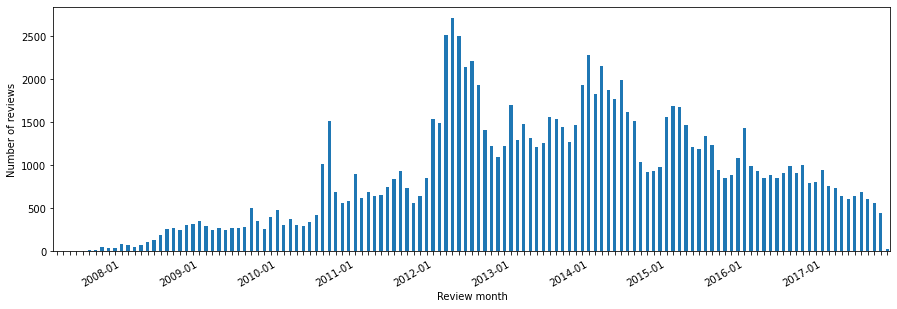

In [379]:
plt.rcParams['figure.figsize'] = [15, 5]

# group all reviews by year and month that they were published
g = review_df.groupby([review_df.date_updated.dt.year, review_df.date_updated.dt.month]).size()
# plot the number of reviews per month as a bar chart
ax = g.plot(kind='bar')
# update the ticks on the x-axis so that they remain readable...
ax.set_xticks(range(len(g)));
# ... with only a tick label for January of each year
ax.set_xticklabels(["%s-%02d" % item if item[1] == 1 else '' for item in g.index.tolist()], rotation=90);
plt.gcf().autofmt_xdate()
plt.xlabel('Review month')
plt.ylabel('Number of reviews')
plt.show()



The first reviews are from late 2007, the last from late 2017. The plot shows that the total number of reviews for these nine books increased from late 2007 with a sudden jump in 2012 and with another jump in 2014. However, with the current scale (over 100,000 reviews) and focus (reviews for nine popular books) we don't see differences in patterns per book. We shift our focus by creating views on numbers of reviews per book.

<AxesSubplot:xlabel='date_updated'>

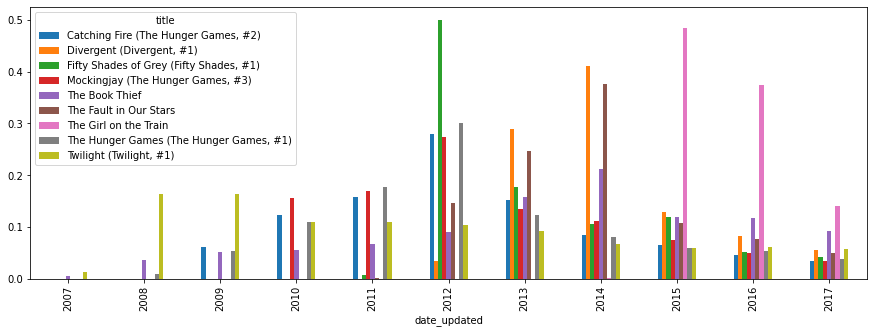

In [353]:
# Group the number of reviews by year and by book title
g = review_df.groupby([review_df.date_updated.dt.year, 'title']).size()
# is zero for years in which a book has no reviews
u = g.unstack('title').fillna(0)
for title in review_df.title.unique():
    # divide the number of reviews for a book in a certain 
    # year by the number of reviews over all years to get proportions
    u[title] = u[title] / sum(u[title])
# plot as bar chart
u.plot(kind='bar')


We notice that there are some marked differences in how reviews of a book are spread over time. For some, there is large burst just after release (especially *Fifty shades grey* with 50% of its reviews in 2012, then the amount of reviews drops off rapidly), while for others the reviews are more spread out, like *Twilight* and particularly *The book thief* which was released in 2005, had a small fraction of its reviews in 2007, but got an increasing amount of reviews up to a peak in 2014, a full 9 years after its release, and still receiving many reviews in 2017. 

We start with analysing the reviews for a single book. A random pick from the book ids:

In [22]:
np.random.choice(list(review_book_ids))

7260188

We create a new dataframe by **selecting** only the reviews for the randomly selected book.

In [10]:
book_id = 7260188
book_df = review_df[review_df.book_id == book_id]
book_df.title.drop_duplicates()

18613    Mockingjay (The Hunger Games, #3)
Name: title, dtype: object

The chosen book is *Mockingjay*, the third book in *The Hunger Games* trilogy by Suzanne Collins. Let's start with a quick look at the ratings to know if we can expect positive and/or negative reviews:

In [11]:

book_df.rating.value_counts()

5    4817
4    4084
3    2834
2    1133
1     363
0     303
Name: rating, dtype: int64

The ratings of zero are not actual ratings, but non-ratings, i.e. the reviewer wrote a review but provided no explicit rating. 

In [12]:
plt.rcParams['figure.figsize'] = [15, 5]

g = book_df.groupby([book_df.date_added.dt.year, 'rating']).size()
u = g.unstack('date_added')
print('year\tavg. rating')
for year in u.columns:
    print(f'{year}\t{book_df[book_df.date_added.dt.year == year].rating.mean(): >4.2f}')
    u[year] = u[year] / sum(u[year])

g = u.stack()
u = g.unstack('rating')
u.plot(kind='bar')



AttributeError: Can only use .dt accessor with datetimelike values

The plot shows that fraction of reviews per year that gets a rating of 1-5 stars (or no rating, represented by the zero values). 

The majority of reviews have a positive rating, and although the fraction of 5-star reviews drops somewhat after the first year (the lowest average rating is in 2014), the majority remains positive. This is typical of online reviews. People don't choose books to read randomly, but those which they expect to like. Furthermore, people who liked a book are more likely willing to put effort into reviewing it. 

Let's look at the differences in review length:

In [13]:
book_df.review_length.value_counts().sort_index()

1        10
2        10
3        30
4        25
5        22
         ..
11845     1
12221     1
12472     1
15704     1
17786     1
Name: review_length, Length: 2503, dtype: int64

The shortest review (in text characters): 1
The longest review (in text characters): 17786
The average review length: 608.3044923895375
The standard deviation in review lengths: 1013.9769171514645

Number of reviews with fewer than 100 characters: 3512
Number of reviews of below average length: 9850
Number of reviews of above average length: 3684


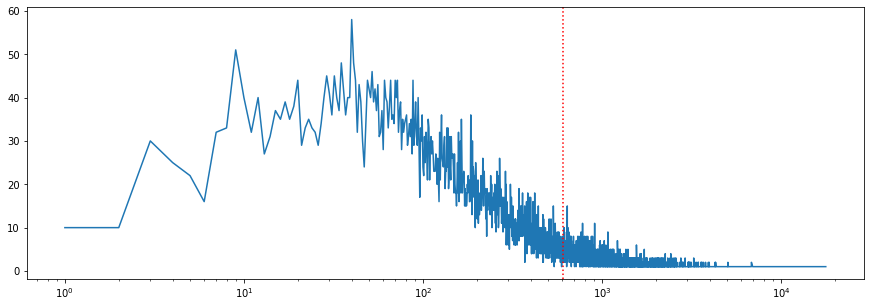

In [14]:
from collections import Counter

# count the number of reviews of each length
counts = book_df.review_length.value_counts().sort_index()
print('The shortest review (in text characters):', book_df.review_length.min())
print('The longest review (in text characters):', book_df.review_length.max())
print('The average review length:', book_df.review_length.mean())
print('The standard deviation in review lengths:', book_df.review_length.std())
print('\nNumber of reviews with fewer than 100 characters:', sum(book_df.review_length < 100))
print('Number of reviews of below average length:', sum(book_df.review_length < book_df.review_length.mean()))
print('Number of reviews of above average length:', sum(book_df.review_length > book_df.review_length.mean()))

dist = {length: count for length, count in counts.iteritems()}
book_df.review_length.value_counts()
x, y = zip(*book_df.review_length.value_counts().sort_index().iteritems())
plt.plot(x, y)
plt.axvline(x=book_df.review_length.mean(), color='red', linestyle='dotted')
plt.xscale('log')


The plot above shows the distribution of review lengths in number of characters per review. There is a large spread in review lengths. There are thousands of reviews with fewer than 100 characters. Based on typical average word lengths in English of just over 4 characters per word, plus whitespace between words, that means that these are reviews with fewer than 20 words. The average length is 628 characters (the red dotted line), while the longest is almost 18,000 characters long (roughly 3600 words).

*Slight tangent on the distribution*: The standard deviation is higher than the average length, signaling that this distribution is skewed towards the left (most reviews are shorter than the average). See the notebook on [Analysing Distributions](./Analyzing-Distributions.ipynb) for  a detailed analysis of the different types of distributions and our arguments on why it is important to know about them and take them into account when interpreting data.


Let's sample a review and look at the text.

In [24]:
random_seed = 1205921

sample_df = book_df.sample(1, random_state=random_seed)

review_text_col = list(sample_df.columns).index('review_text')
sample_df.iloc[0,review_text_col]



"I found the writing great and the story well moving until it got to the end and the unnecessary tortures and games and killing of children ensued. Why repeat that? We didn't need the shock value. We have already established how cruel the Capitol was. I really didn't need to read about people getting killed in more and more creative ways - it seemed self-serving, like the author has some morbid fascination with meat grinders and burning people or letting them torn apart by vicious monsters. It really detracted from the story for me, which I did find interesting and the ending was surprising - although I would have liked to read about the trial instead of Katniss getting locked up again (she is locked up a lot in this book, another annoying bit).   I liked the book very much but I deducted one star for the self-serving, morbid violence that didn't further the story."

This review describes a somewhat negative reading experience due to the violence in the book, but the reviewer found the story interesting and the ending surprising.

Let's compare a small sample of 10 reviews:

In [25]:
from scripts.text_tail_analysis import get_dataframe_review_texts
sample_size = 10
sample_df = book_df.sample(sample_size, random_state=random_seed)

for ri, review_text in enumerate(get_dataframe_review_texts(sample_df)):
    print(f'review {ri+1}:', review_text)
    print('\n')

review 1: I found the writing great and the story well moving until it got to the end and the unnecessary tortures and games and killing of children ensued. Why repeat that? We didn't need the shock value. We have already established how cruel the Capitol was. I really didn't need to read about people getting killed in more and more creative ways - it seemed self-serving, like the author has some morbid fascination with meat grinders and burning people or letting them torn apart by vicious monsters. It really detracted from the story for me, which I did find interesting and the ending was surprising - although I would have liked to read about the trial instead of Katniss getting locked up again (she is locked up a lot in this book, another annoying bit).   I liked the book very much but I deducted one star for the self-serving, morbid violence that didn't further the story.


review 2: No where near as good as the first two


review 3: Amazing! Review to come.


review 4: 1.5 stars   B

Many reviews are very short, just one or two short sentences. Many reviewers mention the ending. This book being the last of a trilogy, this is not unexpected, as this book wraps up a longer narrative. We see quite some difference of opinion.

Taking a first step into a more quantitative analysis of the content, we do a Keyword in Context (KWiC) search for  the words 'end', 'ended' and 'ending' to get insight in what reviewers say about it.

In [26]:
import re


def kwic(pattern, reviews, word_boundaries=True):
    pattern = pattern if not word_boundaries else r'\b' + pattern + r'\b'
    for review in reviews:
        for match in re.finditer(pattern, review):
            start = match.start(0) - 40 if match.start(0) > 40 else 0
            end = match.end(0) + 40
            print(f'{match[1]: <15}{review[start:end]}')
            
pattern = '(end|ends|ended|ending|endings)'
kwic(pattern, get_dataframe_review_texts(sample_df))

end            e story well moving until it got to the end and the unnecessary tortures and games 
ending         e, which I did find interesting and the ending was surprising - although I would have 
ends           se after 2 great books, Suzanne Collins ends her series in such an anti-climatic way
end            This book, despite what happened in the end, is not in support of Peenis. Why? Beca
ending         e, I could not bring myself to like the ending of the novel. It did not seem the least
ending         to get people to read.   This review is ending kind of anti-climatic actually .... oh 
ended          .. oh well, it goes with how Mockingjay ended   If you're pissed off that I didn't li
end            ctually, I'm a bit disappointing by the end of the story
end            r a young adult book.   And towards the end of this finale book I just got fed up w
end            ke I should have stopped reading at the end of book one when I still liked all the 
end            d me speec



Another way to get insight in the content of multiple reviews is to make frequency lists.

In [27]:
import re

tf = Counter()
for text in get_dataframe_review_texts(sample_df):
    # split the texts on any non-word characters
    words = re.split(r'\W+', text.strip())
    # count the number of times each word occurs across the review texts
    tf.update(words)

tf.most_common(20)

[('the', 119),
 ('I', 88),
 ('and', 56),
 ('to', 51),
 ('a', 46),
 ('of', 43),
 ('that', 38),
 ('is', 38),
 ('book', 37),
 ('in', 36),
 ('was', 29),
 ('this', 29),
 ('it', 26),
 ('for', 22),
 ('Katniss', 19),
 ('not', 19),
 ('t', 18),
 ('with', 18),
 ('just', 18),
 ('like', 17)]

Among the top 20 most frequent words, we find a domain-generic term, 'book', as well as the name of a character in the book, 'Katniss'. 

How often do variants of 'end' and 'ending' appear in these 10 reviews?

In [28]:
for term in ['end', 'ends', 'ended', 'ending', 'endings']:
    print(f'{term}:', tf[term])


end: 6
ends: 1
ended: 1
ending: 5
endings: 0


In [29]:
print('Number of words:', sum(tf.values()))
print('Number of distinct words:', len(tf.keys()))


Number of words: 2327
Number of distinct words: 765


We can also use some of the many wonderful open source Natural Language Processing (NLP) tools to have more control on the textual content. We use [Spacy](https://spacy.io) to parsed the reviews to have access to the individual sentences and words, and get additional information on word forms, part-of-speech, lemmas, etc.

We start with listing all entities that Spacy identified in the sample of reviews.

In [30]:
import spacy

# load the large model for English
nlp = spacy.load('en_core_web_lg')

# use nlp to parse each text and store the parsed results as a list of docs
docs = [nlp(text) for text in get_dataframe_review_texts(sample_df)]

# iterate over the docs, then over the entities in each doc and count them
tf = Counter([entity.text for doc in docs for entity in doc.ents])

tf.most_common()


[('Katniss', 18),
 ('Peeta', 10),
 ('first', 7),
 ('one', 6),
 ('2', 3),
 ('Mockingjay', 3),
 ('Suzanne Collins', 3),
 ('Peenis', 3),
 ('Catching Fire', 3),
 ('Capitol', 2),
 ('two', 2),
 ('1.5', 2),
 ('5', 2),
 ('Finnick', 2),
 ('Annie', 2),
 ('Collins', 2),
 ('the Hunger Games', 1),
 ('20', 1),
 ('Bella Swan', 1),
 ('One', 1),
 ('Katniss Everdeen', 1),
 ('Gale', 1),
 ('Finnick Odair', 1),
 ('Coin', 1),
 ('Prim', 1),
 ('another Hunger Games', 1),
 ('Capital', 1),
 ('360', 1),
 ('Games', 1),
 ('Sentance', 1),
 ('I.', 1),
 ('0.5', 1),
 ('blahblahblah', 1),
 ('Book 1', 1),
 ('Three', 1),
 ('The Hunger Games', 1),
 ('only a few months', 1),
 ('baker', 1),
 ('Cinna', 1),
 ('Harry Potter', 1),
 ('three', 1),
 ('second', 1),
 ('third', 1),
 ('just months', 1),
 ('Jay', 1),
 ('Hunger Games', 1),
 ('days', 1),
 ('Twilight', 1),
 ('Bella', 1),
 ('Trish', 1),
 ('the 3 hour', 1),
 ('november of 2014', 1),
 ('1', 1),
 ('the second half', 1),
 ('4.5', 1)]

There is only a short list of entities found in the 10 reviews, most appearing only once. If we look not only at named entities, but at all noun phrases, we get a longer list:

In [31]:
# instead of entities, we can also look at noun-phrases
tf = Counter([ne.text for doc in docs for ne in doc.noun_chunks])

tf.most_common()


[('I', 87),
 ('it', 26),
 ('me', 14),
 ('this book', 13),
 ('Katniss', 12),
 ('you', 11),
 ('It', 10),
 ('she', 10),
 ('they', 10),
 ('the book', 9),
 ('Peeta', 8),
 ('the story', 7),
 ('the end', 6),
 ('them', 6),
 ('the series', 6),
 ('something', 5),
 ('what', 5),
 ('this series', 5),
 ('people', 4),
 ('a book', 4),
 ('nothing', 4),
 ('She', 4),
 ('Prim', 4),
 ('the Games', 4),
 ('We', 3),
 ('the conclusion', 3),
 ('Mockingjay', 3),
 ('Suzanne Collins', 3),
 ('herself', 3),
 ('her', 3),
 ('him', 3),
 ('fire', 3),
 ('who', 3),
 ('Gale', 3),
 ('Peenis', 3),
 ('This book', 3),
 ('myself', 3),
 ('war', 3),
 ('the books', 3),
 ('Catching Fire', 3),
 ('the ending', 2),
 ('5 stars', 2),
 ('deaths', 2),
 ('importance', 2),
 ('angst', 2),
 ('a lot', 2),
 ('humanity', 2),
 ('He', 2),
 ('revenge', 2),
 ('the world', 2),
 ('another Games', 2),
 ('himself', 2),
 ('everything', 2),
 ('Collins', 2),
 ('emotions', 2),
 ('the rest', 2),
 ('the writing', 1),
 ('the unnecessary tortures', 1),
 ('games

Many of these noun chunks are pronouns like 'I', 'me', 'you', 'she', 'they', 'them', 'we'. These are common in reviews, as reviewers often describe their personal reading experience and the affect that the book had on them. In a small sample, they get in way of seeing what content aspects are mentioned.

Spacy adds word form information to each word in the document. We can easily filter out common stopwords to get a better view of the content words that are mentioned.

In [32]:
tf = Counter([token.text for doc in docs for token in doc if not token.is_stop])

tf.most_common(20)


[('.', 157),
 (',', 106),
 ('  ', 40),
 ('book', 37),
 ('-', 21),
 ('?', 19),
 ('Katniss', 19),
 ('like', 17),
 ('series', 17),
 ('read', 11),
 ('story', 10),
 ('Games', 10),
 ('Peeta', 10),
 ('(', 8),
 (')', 8),
 ('books', 8),
 ('loved', 8),
 ('felt', 8),
 ('end', 6),
 ('deaths', 6)]

Now we see many punctuation symbols. Let's filter those out as well.

In [33]:
tf = Counter([token.text for doc in docs for token in doc if not token.is_stop and not token.is_punct])

tf.most_common(20)


[('  ', 40),
 ('book', 37),
 ('Katniss', 19),
 ('like', 17),
 ('series', 17),
 ('read', 11),
 ('story', 10),
 ('Games', 10),
 ('Peeta', 10),
 ('books', 8),
 ('loved', 8),
 ('felt', 8),
 ('end', 6),
 ('deaths', 6),
 ('love', 6),
 ('think', 6),
 ('people', 5),
 ('ending', 5),
 ('good', 5),
 ('Collins', 5)]

The most common words are clearly related to the book domain (such as *book*, *read*, *series*, *story*) and the review domain (*like*, *loved*, *felt*, *love*, *good*). Notice that there are many morphological variants of each other. 

We can also count the word lemmas instead of the surface variants in the text:

In [34]:
tf = Counter([token.lemma_ for doc in docs for token in doc if not token.is_stop and not token.is_punct])

tf.most_common(20)


[('book', 45),
 ('  ', 40),
 ('like', 21),
 ('Katniss', 19),
 ('series', 17),
 ('read', 15),
 ('love', 14),
 ('feel', 14),
 ('story', 10),
 ('end', 10),
 ('Games', 10),
 ('death', 10),
 ('character', 9),
 ('Peeta', 9),
 ('think', 8),
 ('get', 7),
 ('good', 7),
 ('way', 6),
 ('let', 6),
 ('star', 6)]

Now we also see *end* as a common word. 

### Zooming out to more reviewers

With 10 short reviews we can only see a few commonalities and distinctions. Several mention the ending, some like and some don't. A quantitative perspective doesn't give us much beyond what a close reading of the reviews would give us. 

If we zoom out to a larger group of 10,000 reviews, we get a more stable picture of what aspects are commonly mentioned. But now a different problems rears up.

In [54]:
from scripts.text_tail_analysis import read_spacy_docs_for_dataframe, select_dataframe_spacy_docs
import spacy
import time

nlp = spacy.load('en_core_web_lg')
fname = '../data/goodreads-reviews-books_above_10k.doc_bin'
start = time.time()
review_docs = read_spacy_docs_for_dataframe(fname, review_df, nlp)
print('took:', time.time() - start, 'seconds')
print('number of spacy docs loaded:', len(review_docs))
book_docs = select_dataframe_spacy_docs(book_df, review_docs, as_dict=True)
print('number of spacy docs selected:', len(book_docs.keys()))

took: 294.7146508693695 seconds
number of spacy docs loaded: 113338
number of spacy docs selected: 12607


In [35]:
sample_size = 10000
sample_df = book_df.sample(sample_size, random_state=random_seed)
docs = [nlp(text) for text in get_dataframe_review_texts(sample_df)]
docs = select_dataframe_spacy_docs(sample_df, review_docs, as_dict=False)


# calculate the term frequency of individual words
tf = Counter([token.lemma_ for doc in docs for token in doc if not token.is_stop and not token.is_punct])

tf.most_common(20)


[('book', 16843),
 ('  ', 14091),
 ('Katniss', 9164),
 ('like', 6744),
 ('read', 6651),
 ('end', 6424),
 ('series', 5948),
 ('love', 5158),
 ('think', 4737),
 ('character', 4217),
 ('Peeta', 4105),
 ('feel', 4090),
 ('ending', 3969),
 ('good', 3882),
 ('story', 3162),
 ('Collins', 3136),
 ('time', 2856),
 ('Games', 2853),
 ('way', 2794),
 ('Hunger', 2763)]

This list is very similar to the one for ten reviews. The book and review domain terms, plus the names of the book, author and main characters. 

Plain word lists are a quick way to get an overview of what is common across a set of reviews. Apart from total word counts, we can also count each word once per document regardless of how frequently the reviewer uses it, so that we get insight in how many reviewers mention a specific term, e.g. 'ending'. With each review being a document, this frequency is known as the *document frequency*.

In [38]:
from scripts.text_tail_analysis import get_doc_word_token_set

df = Counter([lemma for doc in docs for lemma in get_doc_word_token_set(doc, use_lemma=True)])

df.most_common(20)

[('book', 6163),
 ('series', 3850),
 ('end', 3713),
 ('read', 3688),
 ('like', 3324),
 ('Katniss', 3118),
 ('ending', 2949),
 ('love', 2880),
 ('good', 2792),
 ('think', 2639),
 ('character', 2375),
 ('feel', 2305),
 ('story', 1960),
 ('Collins', 1950),
 ('Hunger', 1891),
 ('trilogy', 1870),
 ('Games', 1861),
 ('time', 1852),
 ('Peeta', 1842),
 ('way', 1832)]

This is quite insightful. There are 3713 reviews (37% of the 10,000 in the sample) that mention the word *end* and 2949 reviews (could be many of the same reviews) that mention *ending*. Also, 2375 reviewers mention the word *character*, and 1960 mention *story*. 

But what is the problem that rears up here? Let's look at the total number of words and distinct word forms:

In [39]:
print('Number of words:', sum(tf.values()))
print('Number of distinct words:', len(tf.keys()))


Number of words: 487298
Number of distinct words: 27632


The 10,000 reviews contain 487,298 words in total, and 27,632 distinct words. Above, we have looked at only the 20 most frequent ones. What are these remaining 27,612 words?

This is where the highly skewed distribution of word frequencies throws up barriers to analysis. How do we get a good overview of what those low-frequency are?

In [40]:
sizes = [10, 20, 100, 200]
for size in sizes:
    sum_top = sum([freq for term, freq in tf.most_common(size)])
    print(f'Sum frequency of top {size} terms: {sum_top} (fraction: {sum_top / sum(tf.values()): >.2f})')


Sum frequency of top 10 terms: 79977 (fraction: 0.16)
Sum frequency of top 20 terms: 113587 (fraction: 0.23)
Sum frequency of top 100 terms: 211555 (fraction: 0.43)
Sum frequency of top 200 terms: 263236 (fraction: 0.54)


These top 20 terms represent only 25% of all words. Even if we look at the top 200 words, we're ignoring half of the text. 

In [172]:
tf_lemma_pos = Counter([(token.lemma_, token.pos_) for doc in docs for token in doc if not token.is_stop and not token.is_punct])

tf_lemma_pos.most_common(20)


[(('book', 'NOUN'), 1785),
 (('  ', 'SPACE'), 1221),
 (('Katniss', 'PROPN'), 874),
 (('read', 'VERB'), 633),
 (('series', 'NOUN'), 575),
 (('think', 'VERB'), 530),
 (('character', 'NOUN'), 473),
 (('feel', 'VERB'), 417),
 (('ending', 'NOUN'), 416),
 (('love', 'VERB'), 416),
 (('good', 'ADJ'), 409),
 (('Peeta', 'PROPN'), 387),
 (('like', 'SCONJ'), 371),
 (('end', 'NOUN'), 354),
 (('go', 'VERB'), 315),
 (('story', 'NOUN'), 313),
 (('like', 'VERB'), 306),
 (('Collins', 'PROPN'), 305),
 (('want', 'VERB'), 302),
 (('know', 'VERB'), 289)]

### Long Tails and Classification

One thing we can do to organise items in the long tail is to categorise or classify them. 

- group by part-of-speech: this 
- group by frequent terms in the sentence that they have a syntactical dependency with
- group by semantic information about each word based on external resources, like sentiment, synonyms, hypernyms, or domain specific word categorisations (e.g. LIWC, Wordnet, ...).

In [299]:
from collections import defaultdict
from scripts.text_tail_analysis import show_pos_tail_distribution

tf_lemma_pos = Counter([(token.lemma_, token.pos_) for doc in docs for token in doc if not token.is_stop and not token.is_punct])

show_pos_tail_distribution

Word form	All TF (frac)	TF <= 5 (frac)	TF = 1 (frac)
----------------------------------------------
VERB        	 12830  0.28	  1671  0.21	   564  0.19
NOUN        	 16541  0.36	  2876  0.36	  1014  0.34
ADJ         	  6866  0.15	  1757  0.22	   674  0.22
PROPN       	  4738  0.10	   715  0.09	   408  0.13
SCONJ       	   418  0.01	     4   0.0	     1   0.0
NUM         	   481  0.01	   121  0.02	    49  0.02
ADV         	  2438  0.05	   502  0.06	   210  0.07
X           	    51  0.00	    41  0.01	    26  0.01
INTJ        	   407  0.01	   141  0.02	    35  0.01
SPACE       	  1221  0.03	     0   0.0	     0   0.0
PUNCT       	    32  0.00	    32   0.0	    22  0.01
CCONJ       	    12  0.00	    12   0.0	     0   0.0
PRON        	    17  0.00	    17   0.0	     4   0.0
PART        	    35  0.00	     0   0.0	     0   0.0
ADP         	    40  0.00	    20   0.0	    10   0.0
DET         	    10  0.00	    10   0.0	     6   0.0
SYM         	     1  0.00	     1   0.0	     1   0.0


Above we see the proportion of Part-Of-Speech tags across all words and across words that occur at most five times  and at most once. **Remember, this is after removal of stopwords and punctuation**.

- First, the largest categories overall are nouns (36%), verbs (28%), adjectives (15%), proper nouns (10%) and adverbs (5%). Proper nouns refer to single identifiable entities.

- Among the less frequent words, the proportion of nouns and adverbs remain stable, the proportion of verbs drop, while the number of adjectives and proper nouns go up. 

In other words, the tail has relatively many adjectives and entities, but also many other nouns. In terms of content analysis, these are important categories. Of course, with 1000 reviews and only a few thousand of these words, it is possible to go through all of them to get insights in what they are and how they relate to the book, the reading experience or something else. If we were to scale up to tens of thousands or millions of reviews, this would become increasingly infeasible. 


In [421]:
from scripts.text_tail_analysis import get_lemma_pos_df_index

In [431]:
df_group1 = book_df[book_df.rating > 3]
df_group2 = book_df[book_df.rating < 3]

book_docs_group1 = select_dataframe_spacy_docs(df_group1, review_docs, as_dict=True)
book_docs_group2 = select_dataframe_spacy_docs(df_group2, review_docs, as_dict=True)

print(len(book_docs_group1), len(book_docs_group2))

8269 1671


In [438]:
token_pos_types = ['ADJ', 'ADV', 'NOUN', 'PROPN', 'VERB']
docs_group1 = [book_docs_group1[review_id] for review_id in book_docs_group1]
docfreq_group1 = get_lemma_pos_df_index(docs_group1, keep_pron=True)

docs_group2 = [book_docs_group2[review_id] for review_id in book_docs_group2]
docfreq_group2 = get_lemma_pos_df_index(docs_group2, keep_pron=True)

total_group1 = len(book_docs_group1)
total_group2 = len(book_docs_group2)

for pos_type in token_pos_types:
    for term, freq in docfreq_group1.most_common(1000):
        lemma, pos = term
        if pos != pos_type:
            continue
        prop_group1 = freq / total_group1
        prop_group2 = docfreq_group2[term] / total_group2
        prop = prop_group2 / prop_group1
        if prop < 1.5:
            continue
        print(f'{lemma: <20}{pos: <6}{freq: >6}{docfreq_group2[term]: >6}{prop_group1: >8.4f}{prop_group2: >8.4f}{prop: >6.2f}')



bad                 ADJ      684   324  0.0827  0.1939  2.34
well                ADJ      627   201  0.0758  0.1203  1.59
second              ADJ      597   213  0.0722  0.1275  1.77
strong              ADJ      521   200  0.0630  0.1197  1.90
big                 ADJ      370   149  0.0447  0.0892  1.99
interesting         ADJ      339   131  0.0410  0.0784  1.91
main                ADJ      282   145  0.0341  0.0868  2.54
old                 ADJ      270    82  0.0327  0.0491  1.50
disappointed        ADJ      217   186  0.0262  0.1113  4.24
depressing          ADJ      215    94  0.0260  0.0563  2.16
high                ADJ      170    70  0.0206  0.0419  2.04
horrible            ADJ      150    79  0.0181  0.0473  2.61
possible            ADJ      136    50  0.0164  0.0299  1.82
weak                ADJ      125    91  0.0151  0.0545  3.60
major               ADJ      123    72  0.0149  0.0431  2.90
huge                ADJ      119    58  0.0144  0.0347  2.41
terrible            ADJ 

**Adjectives**:

- 'bad', 'strong', 'big', 'interesting', 'main, 'old', 'disappointed'

**Adverbs**:

**Nouns**:

- 'character', 'page', 'author', 'point', 'plot', 'writing'

**Pronouns**:

If we compare the proper nouns, we see that the negative reviews make a comparison to the Twilight series. 

**Verbs**:

- 'get', 'die', 'kill', 'start', 'try', 'hate', 'tell', 'mean', 'care', 'spend', 'throw'


In [459]:
tail_groupings = get_tail_groupings(docs_group2, docfreq_group2, token_pos_types, liwc, max_threshold=5000, min_threshold=10)

tail_df = pd.DataFrame(tail_groupings)

book_terms = ['book', 'novel', 'story', 'plot', 'character', 'twist', 'development']

tail_df[(tail_df.dependency_word == 'bad') & (tail_df.tail_pos == 'NOUN')]


,dependency_type,dependency_word,dependency_pos,dependency_freq,tail_word,tail_pos,tail_freq,dep_tail_freq,liwc_category
19237,head,bad,ADJ,324,year,NOUN,102,1,relativ|time
19239,head,bad,ADJ,324,character,NOUN,1071,1,None
43829,child,bad,ADJ,324,book,NOUN,3681,20,None
43830,child,bad,ADJ,324,term,NOUN,24,1,quant|relativ|time
43832,child,bad,ADJ,324,thing,NOUN,519,13,None
43833,child,bad,ADJ,324,part,NOUN,71,8,funct|quant
43834,child,bad,ADJ,324,mood,NOUN,10,2,affect
43835,child,bad,ADJ,324,outcome,NOUN,15,1,None
43836,child,bad,ADJ,324,ending,NOUN,565,10,relativ|time
43838,child,bad,ADJ,324,writing,NOUN,133,4,social|cogmech


In [453]:
from scripts.text_tail_analysis import has_lemma_pos, sentence_iter
lemma = 'writing'
pos = 'NOUN'

for sent in sentence_iter(docs_group2):
    if has_lemma_pos(sent, lemma, pos):
        print(sent)

I question the plot, the writing, and the capricious actions of characters.
Ofcourse, I was not expecting any Shakespearean writing in it but the whole book literally felt like that it was written by a 10-year-old; nothing really deep, not as exciting as the previous ones and a rush, out of nowhere ending!   
The writing style was still good, but I couldn't get into the storyline as deeply.
The quality of the writing has seriously deteriorated, the main character has become a hysterical, trauma-ridden, selfish, self-pitying whiner, and the plot has taken a suicide leap.   
It seems that without the Arena to set the stage Collin's writing has stuttered out and Katniss has lost her fire.   
With the monotone writing, the monotone character of Katniss, and the monotone plot, the monotone and banal setting of District 13 doesn't help much.
I also felt cheated by the writing in this installation.
I obviously expect a war to be violent but the tone of the writing in this book (and the previo

In my experience, the final book of a series is generally the best writing-wise.
However, as any writer knows, long words do not equal good writing.
To be able to experience Panem, its corrupted core, and everything else the book contains without being weighed down with the chintzy, high school-level writing will be very exciting.   
It is nothing personal, but I just can't stand the terrible writing, cliche-plot, irrational characters, and the whining teen-girl.
In my view, that's just not good writing -- it's like seeing the stage hand during a play.   


In [454]:
from scripts.text_tail_analysis import has_lemma_pos, sentence_iter
lemma = 'bad'
pos = 'ADJ'

for sent in sentence_iter(docs_group2):
    if has_lemma_pos(sent, lemma, pos):
        print(sent)

At times it's like reading a bad diary.
The worst, though, was that I could see it all coming
This is not my favorite book ever, but it's also not the worst book I've ever read.
First of all, Katniss and Gale stop speaking on bad terms.
This was bad....
worst book in the series.
And good and bad are not clearly defined black and white.
Even in real life, no matter how bad things may be, there is always hope.
Katniss is likely suffering from some form of PTSD, but rather than use the horrific experiences that keep piling up on Katniss as a jumping off point to explore what war-like events do to younger people (such as child soldiers), Collins shuffles around the whole issue by constantly throwing more bad things at Katniss so any recovery or clarity she gains is immediately destroyed by what happens next.   
But worse than this is the final fifty pages of the book when the twist is revealed, and I was left completely not caring because all the build up to make Katniss strong, to have he

It's hard to begrudge Collins for concentrating on the complexities of war, where there are no good guys and bad guys, only uneasy alliances, or giving Katniss such a lot to think about.
, so it wasn't the worst thing I've ever read.
After the death of a beloved character, Collins composed a passage that I think aimed for high-brow narrative of loss but came across as an LSD-fueled bungle of bad descriptive poetry;   (5)
Things get worse from there.   
The worst ending I could have imagined.
Too bad.   
Out of the three books, this one I thought was the worst.
Can't really say I was expecting much, I find that the third books in trilogies to often be worse than the first two.
"it's all my fault, I'm a bad person" business.
Yes, war is bad.
Everything gets even worse in this book.
Bad dialogue.
Bad writing.
When I reached to the ending, it got even worse.
Not Mockingjay, what a bad ending to a decent series.
One of the WORST endings to a trilogy I have ever seen.
I was hoping for some k

In [439]:
for pos_type in token_pos_types:
    for term, freq in docfreq_group1.most_common(1000):
        lemma, pos = term
        if pos != pos_type:
            continue
        prop_group1 = freq / total_group1
        prop_group2 = docfreq_group2[term] / total_group2
        prop = prop_group2 / prop_group1
        if prop > 0.66:
            continue
        print(f'{lemma: <20}{pos: <6}{freq: >6}{docfreq_group2[term]: >6}{prop_group1: >8.4f}{prop_group2: >8.4f}{prop: >6.2f}')



great               ADJ     1713   205  0.2072  0.1227  0.59
happy               ADJ     1209   127  0.1462  0.0760  0.52
sad                 ADJ      999   128  0.1208  0.0766  0.63
amazing             ADJ      929    86  0.1123  0.0515  0.46
perfect             ADJ      556    23  0.0672  0.0138  0.20
dark                ADJ      436    58  0.0527  0.0347  0.66
realistic           ADJ      367    44  0.0444  0.0263  0.59
wonderful           ADJ      310    23  0.0375  0.0138  0.37
excellent           ADJ      258    15  0.0312  0.0090  0.29
fantastic           ADJ      257    29  0.0311  0.0174  0.56
powerful            ADJ      223    23  0.0270  0.0138  0.51
brilliant           ADJ      223    28  0.0270  0.0168  0.62
satisfied           ADJ      215    22  0.0260  0.0132  0.51
beautiful           ADJ      209    11  0.0253  0.0066  0.26
intense             ADJ      191    21  0.0231  0.0126  0.54
certain             ADJ      190    25  0.0230  0.0150  0.65
heartbreaking       ADJ 

- adjectives: 'great', 'happy', 'sad', 'amazing', 'perfect', 'dark', 'realistic'. The word 'dark' is probably intended as a positive aspect. 
- adverbs: 'definitely', 'highly', 'emotionally', 'perfectly', 'beautifully'
- nouns: 'heart', 'read', 'question', 'tear'
- proper nouns: 'Everdeen', 'series', 'Trilogy', 'MOCKINGJAY'
- Verbs: 'cry', 'recommend', 'reread', 'thank', 'provoke', 'surprise, 'grip', 'devour', 'relate


In [437]:
for pos_type in token_pos_types:
    for term, freq in docfreq_group1.most_common(1000):
        lemma, pos = term
        if pos != pos_type:
            continue
        prop_group1 = freq / total_group1
        prop_group2 = docfreq_group2[term] / total_group2
        prop = prop_group2 / prop_group1
        if prop < 0.66 or prop > 1.5:
            continue
        print(f'{lemma: <20}{pos: <6}{freq: >6}{docfreq_group2[term]: >6}{prop_group1: >8.4f}{prop_group2: >8.4f}{prop: >6.2f}')



good                ADJ     3199   594  0.3869  0.3555  0.92
little              ADJ     1204   208  0.1456  0.1245  0.85
real                ADJ     1151   183  0.1392  0.1095  0.79
final               ADJ      867   178  0.1048  0.1065  1.02
favorite            ADJ      618   100  0.0747  0.0598  0.80
sure                ADJ      592   117  0.0716  0.0700  0.98
different           ADJ      592    85  0.0716  0.0509  0.71
hard                ADJ      539   118  0.0652  0.0706  1.08
glad                ADJ      507    76  0.0613  0.0455  0.74
young               ADJ      475    81  0.0574  0.0485  0.84
entire              ADJ      472   136  0.0571  0.0814  1.43
new                 ADJ      451    68  0.0545  0.0407  0.75
emotional           ADJ      424    65  0.0513  0.0389  0.76
true                ADJ      401    76  0.0485  0.0455  0.94
right               ADJ      392    58  0.0474  0.0347  0.73
previous            ADJ      356    84  0.0431  0.0503  1.17
long                ADJ 

The word 'end' is used slightly more in positive reviews, while 'ending' is used more in negative reviews. 

In [365]:
from scripts.liwc import LIWC

# This dictionary is part of LIWC 2007, which is a commercial product, so not available in our Github repo
liwc_dict_file = '../data/LIWC2007_English131104.dic'

liwc = LIWC(liwc_dict_file)

Reading dictionary file ../data/LIWC2007_English131104.dic
encoding = utf-8
number of words : 4482
number of categories : 64


In [366]:
sample_size = 1000
sample_df = book_df.sample(sample_size, random_state=random_seed)
sample_docs = select_dataframe_spacy_docs(sample_df, review_docs, as_dict=True)


In [367]:
from scripts.text_tail_analysis import get_lemma_pos_tf_index, group_by_head, group_by_child

token_pos_types = ['ADJ', 'NOUN', 'PROPN', 'VERB']
doc_list = [sample_docs[review_id] for review_id in sample_docs]
tf_lemma_pos = get_lemma_pos_tf_index(doc_list)




In [369]:
from scripts.text_tail_analysis import get_tail_groupings

tail_groupings = get_tail_groupings(doc_list, tf_lemma_pos, token_pos_types, liwc, max_threshold=5, min_threshold=0)

tail_df = pd.DataFrame(tail_groupings)

book_terms = ['book', 'novel', 'story', 'plot', 'character', 'twist', 'development']

tail_df[(tail_df.tail_pos == 'ADJ') & (tail_df.dependency_word == 'book')]

,dependency_type,dependency_word,dependency_pos,dependency_freq,tail_word,tail_pos,tail_freq,dep_tail_freq,liwc_category
218,head,book,NOUN,1630,eighth,ADJ,1,1,None
220,head,book,NOUN,1630,sappy,ADJ,2,1,None
221,head,book,NOUN,1630,disjointed,ADJ,5,1,None
223,head,book,NOUN,1630,government,ADJ,1,1,None
224,head,book,NOUN,1630,exceptional,ADJ,5,1,None
226,head,book,NOUN,1630,middle,ADJ,5,1,None
227,head,book,NOUN,1630,lengthy,ADJ,2,1,None
229,head,book,NOUN,1630,later,ADJ,2,1,relativ|time
232,head,book,NOUN,1630,remarkable,ADJ,3,1,None
233,head,book,NOUN,1630,separate,ADJ,2,1,None


In [221]:
tail_groupings = get_tail_groupings(doc_list, tf_lemma_pos, token_pos_types, liwc, max_threshold=50, min_threshold=10)

tail_df = pd.DataFrame(tail_groupings)

book_terms = [
    'book', 'novel', 'story', 'plot', 'character', 'twist', 'development', 
    'pace', 'scene', 'setting', 'narrative', 'theme', 'event']
author_terms = ['writing', 'style', 'write', 'author', 'writer', 'voice', 'describe', 'explain']
reader_terms = ['reader', 'feel', 'feeling', 'make', 'pull', 'throw']
tail_df[(tail_df.dependency_word == 'describe')]

,dependency_type,dependency_word,dependency_pos,dependency_freq,tail_word,tail_pos,tail_freq,dep_tail_freq,liwc_category
2501,head,describe,VERB,20,describe,VERB,20,3,verb|present|social
2502,head,describe,VERB,20,event,NOUN,40,1,relativ|time
2503,head,describe,VERB,20,feeling,NOUN,50,1,None
2504,head,describe,VERB,20,theme,NOUN,19,1,None
2505,head,describe,VERB,20,scene,NOUN,30,1,None
2506,head,describe,VERB,20,explain,VERB,29,1,verb|present|social|cogmech|insight
9015,child,describe,VERB,20,word,NOUN,42,3,None
9016,child,describe,VERB,20,begin,VERB,35,1,verb|present|relativ|time
9017,child,describe,VERB,20,reality,NOUN,19,1,cogmech|certain
9018,child,describe,VERB,20,pull,VERB,11,1,None


In [251]:
terms = ['memorable', 'chilling', 'overwrought', 'gripping']
for term in terms:
    syns = wn.synsets(term)
    for syn in syns:
        print(syn.lemmas())
        print(syn.hypernyms())
        #print(syn.hyponyms())
        affect = wn.synset('affect.v.01')
        print(syn.wup_similarity(affect))
        print()


[Lemma('memorable.s.01.memorable')]
[]
None

[Lemma('cooling.n.01.cooling'), Lemma('cooling.n.01.chilling'), Lemma('cooling.n.01.temperature_reduction')]
[Synset('temperature_change.n.01')]
None

[Lemma('chill.v.01.chill')]
[Synset('depress.v.01')]
0.2857142857142857

[Lemma('cool.v.01.cool'), Lemma('cool.v.01.chill'), Lemma('cool.v.01.cool_down')]
[Synset('change.v.01')]
0.3333333333333333

[Lemma('cool.v.02.cool'), Lemma('cool.v.02.chill'), Lemma('cool.v.02.cool_down')]
[Synset('change_state.v.01')]
0.2857142857142857

[Lemma('chilling.s.01.chilling'), Lemma('chilling.s.01.scarey'), Lemma('chilling.s.01.scary'), Lemma('chilling.s.01.shivery'), Lemma('chilling.s.01.shuddery')]
[]
None

[Lemma('distraught.s.01.distraught'), Lemma('distraught.s.01.overwrought')]
[]
None

[Lemma('grip.v.01.grip')]
[Synset('seize.v.01')]
0.2857142857142857

[Lemma('grapple.v.02.grapple'), Lemma('grapple.v.02.grip')]
[Synset('seize.v.01')]
0.2857142857142857

[Lemma('fascinate.v.02.fascinate'), Lemma('fasc

In [315]:
review_df.groupby(['book_id', 'author_name', 'title']).size()

book_id   author_name      title                                  
19063     Markus Zusak     The Book Thief                             10547
41865     Stephenie Meyer  Twilight (Twilight, #1)                     9826
2767052   Suzanne Collins  The Hunger Games (The Hunger Games, #1)    17403
6148028   Suzanne Collins  Catching Fire (The Hunger Games, #2)       11057
7260188   Suzanne Collins  Mockingjay (The Hunger Games, #3)          12607
10818853  E.L. James       Fifty Shades of Grey (Fifty Shades, #1)    10257
11870085  John Green       The Fault in Our Stars                     19151
13335037  Veronica Roth    Divergent (Divergent, #1)                   9866
22557272  Paula Hawkins    The Girl on the Train                      12624
dtype: int64

In [321]:
sample_size = 1000
hg1_df = review_df[review_df.book_id == 2767052]
sample_hg1_df = hg1_df.sample(sample_size)
sample_hg1_df
docs_hg1 = [nlp(text) for text in get_sample_review_texts(sample_hg1_df)]


In [322]:
tf_lemma_pos = get_lemma_pos_tf_index(docs + docs_hg1)


In [326]:
child_group_hg1 = group_by_child(docs_hg1, tf_lemma_pos, token_pos_types, max_threshold=5)

shared_tokens = [token for token in child_group_hg1 if token in child_group]

token_lemma_pos = ('Katniss', 'PROPN')
if token_lemma_pos in child_group_hg1:
    print(token_lemma_pos)
    for token_pos in token_pos_types:
        print('\t', token_pos, '\t', [lemma for lemma, pos in child_group_hg1[token_lemma_pos] if pos == token_pos])
    print()


#for token_lemma_pos in child_group_hg1:
for token_lemma_pos in shared_tokens:
    if sum(child_group_hg1[token_lemma_pos].values()) < 20:
        continue
    print(token_lemma_pos)
    for token_pos in token_pos_types:
        print('\t', token_pos, '\t', [lemma for lemma, pos in child_group[token_lemma_pos] if pos == token_pos])
        print('\t', token_pos, '\t', [lemma for lemma, pos in child_group_hg1[token_lemma_pos] if pos == token_pos])
        print()


('Katniss', 'PROPN')
	 ADJ 	 []
	 NOUN 	 ['prowess', 'behaviour', 'mask', 'monologueing', 'selflessness', 'crisis', 'tomboyishness', 'forehead', 'pin', 'volunter', 'reluctance', 'falseness', 'eyesight', 'volenteer', 'hunt', 'viewpoint']
	 PROPN 	 ['Goes', 'Szeyenne', 'story', 'Ngunit', 'Everdeen-', 'edumped']

('read', 'VERB')
	 ADJ 	 ['exhausting', 'stoked', 'eager']
	 ADJ 	 ['hesitant', 'psyched', 'adamant']

	 NOUN 	 ['generation', 'joy', 'push', 'try', 'sob']
	 NOUN 	 ['headache', 'wish', 'yearn', 'holiday', 'crime', 'reluctance', 'promise', 'thon', 'chore', 'million', 'blessing', 'urge', 'disclaimer', 'car', 'instance', 'hurry', 'category']

	 PROPN 	 []
	 PROPN 	 []

('Katniss', 'PROPN')
	 ADJ 	 ['redeeming', 'lead', 'twisted', 'married']
	 ADJ 	 []

	 NOUN 	 ['host', 'liberation', 'intervention', 'evolution', 'talk', 'desire', 'progression', 'hallucination', 'relationsip', 'pov', 'channel', 'trial', 'turmoil', 'doing', 'house', 'search', 'bout', 'escapade', 'involve', 'process',

In [198]:
def filter_doc_terms(doc, filter_terms):
    return [token for token in doc if token in filter_terms]
    
def doc_generator(docs, use_sentences=False):
    for doc in docs:
        if use_sentences:
            for sent in doc.sents:
                yield sent
        else:
            yield doc

def get_cooc(docs, filter_terms=None, use_sentences=False, use_lemma=False):
    cooc = Counter()
    for doc in doc_generator(docs, use_sentences=use_sentences):
        token_set = get_doc_token_set(doc, use_lemma=use_lemma)
        if filter_terms:
            token_set = filter_doc_terms(token_set, filter_terms)
        cooc.update([term_pair for term_pair in combinations(sorted(token_set), 2)])
    return cooc



In [199]:
common_terms = [term for term, freq in df.most_common() if freq >= 100 and term != '  ']
cooc = get_cooc(docs, filter_terms=common_terms, use_sentences=False, use_lemma=True)


cooc.most_common(50)



[(('book', 'read'), 308),
 (('book', 'end'), 280),
 (('book', 'series'), 271),
 (('book', 'like'), 271),
 (('Katniss', 'book'), 254),
 (('book', 'good'), 214),
 (('book', 'think'), 213),
 (('book', 'love'), 212),
 (('book', 'character'), 201),
 (('Katniss', 'end'), 199),
 (('book', 'ending'), 198),
 (('read', 'series'), 198),
 (('book', 'feel'), 196),
 (('end', 'series'), 190),
 (('Games', 'Hunger'), 189),
 (('Katniss', 'read'), 184),
 (('like', 'read'), 179),
 (('end', 'read'), 178),
 (('end', 'like'), 177),
 (('book', 'way'), 176),
 (('Katniss', 'like'), 174),
 (('Collins', 'book'), 170),
 (('book', 'story'), 169),
 (('Games', 'book'), 168),
 (('Hunger', 'book'), 168),
 (('book', 'time'), 164),
 (('like', 'series'), 163),
 (('Katniss', 'series'), 161),
 (('read', 'think'), 154),
 (('end', 'think'), 153),
 (('Katniss', 'think'), 153),
 (('Katniss', 'Peeta'), 152),
 (('Katniss', 'character'), 148),
 (('end', 'love'), 148),
 (('character', 'end'), 147),
 (('like', 'think'), 146),
 (('bo

In [200]:
cooc = get_cooc(docs, filter_terms=common_terms, use_sentences=True, use_lemma=True)
cooc.most_common(50)



[(('Games', 'Hunger'), 283),
 (('book', 'read'), 200),
 (('book', 'like'), 179),
 (('Katniss', 'Peeta'), 164),
 (('Katniss', 'book'), 144),
 (('book', 'series'), 129),
 (('book', 'good'), 126),
 (('Katniss', 'end'), 117),
 (('book', 'end'), 117),
 (('feel', 'like'), 115),
 (('book', 'think'), 109),
 (('book', 'love'), 109),
 (('Gale', 'Katniss'), 108),
 (('Gale', 'Peeta'), 103),
 (('book', 'feel'), 100),
 (('Collins', 'Suzanne'), 98),
 (('Katniss', 'like'), 90),
 (('end', 'series'), 82),
 (('Collins', 'book'), 81),
 (('read', 'series'), 78),
 (('book', 'character'), 77),
 (('Hunger', 'book'), 74),
 (('Katniss', 'think'), 74),
 (('Games', 'book'), 73),
 (('Katniss', 'love'), 73),
 (('end', 'like'), 69),
 (('book', 'trilogy'), 67),
 (('Katniss', 'feel'), 66),
 (('Katniss', 'character'), 65),
 (('Peeta', 'end'), 65),
 (('book', 'story'), 63),
 (('end', 'way'), 63),
 (('book', 'way'), 62),
 (('book', 'time'), 60),
 (('Peeta', 'love'), 60),
 (('end', 'think'), 58),
 (('book', 'thing'), 56),

In [268]:
from helper import get_pmi_cooc

pmi_cooc = get_pmi_cooc(df, cooc, filter_terms=common_terms)

for ti, term_pair in enumerate(pmi_cooc):
    print(term_pair, pmi_cooc[term_pair])
    if ti == 10:
        break

('Games', 'Hunger') 6.460479234356834
('Collins', 'Suzanne') 6.088259967047493
('Gale', 'Peeta') 5.99832727669207
('Katniss', 'Peeta') 5.610687390134804
('Gale', 'Katniss') 5.495901734017394
('Collins', 'write') 4.992401742361956
('feel', 'like') 4.943319340093928
('Games', 'final') 4.925125255903836
('Hunger', 'final') 4.915074920050335
('Games', 'Mockingjay') 4.733835029127121
('Hunger', 'Mockingjay') 4.72378469327362


In [296]:
from helper import get_doc_content_chunks
from scripts.pmi import PMICOOC

token_sets = [sent_chunks for doc in docs for sent_chunks in get_doc_content_chunks(doc)]
token_sets = [[token.lemma_ if token.lemma_ != '-PRON-' else token.text for token in token_set] for token_set in token_sets]
pmi_cooc = PMICOOC(token_sets, filter_terms=common_terms)
token_freq = Counter([token for token_set in token_sets for token in token_set])
cooc_freq = Counter([token_pair for token_set in token_sets for token_pair in combinations([token for token in token_set], 2)])
pmi_cooc = get_pmi_cooc(token_freq, cooc_freq, filter_terms=common_terms)

for ti, term_pair in enumerate(pmi_cooc):
    print(term_pair, pmi_cooc[term_pair])
    if ti == 10:
        break

('ending', 'trilogy') 5.6627197008620245
('lot', 'lot') 3.73396263103296
('like', 'Games') 3.703295832639988
('way', 'way') 3.5018627676966796
('enjoy', 'series') 3.13889763482435
('series', 'book') 3.086841272868297
('like', 'ending') 3.0101486520800425
('Suzanne', 'character') 2.9081494841249214
('lot', 'people') 2.805975859395614
('story', 'thing') 2.583653438550424
('book', 'book') 2.541614222384974


In [313]:
from scripts.pmi import PMICOOC
pmi_cooc = PMICOOC(token_sets, filter_terms=common_terms)

for term in pmi_cooc.highest(5):
    print(term, pmi_cooc[term])

('ending', 'trilogy') 5.6627197008620245
('lot', 'lot') 3.73396263103296
('like', 'Games') 3.703295832639988
('way', 'way') 3.5018627676966796
('enjoy', 'series') 3.13889763482435
('series', 'book') 3.086841272868297


In [317]:
for term in pmi_cooc:
    print(term, pmi_cooc[term])

('ending', 'trilogy') 5.6627197008620245
('lot', 'lot') 3.73396263103296
('like', 'Games') 3.703295832639988
('way', 'way') 3.5018627676966796
('enjoy', 'series') 3.13889763482435
('series', 'book') 3.086841272868297
('like', 'ending') 3.0101486520800425
('Suzanne', 'character') 2.9081494841249214
('lot', 'people') 2.805975859395614
('story', 'thing') 2.583653438550424
('book', 'book') 2.541614222384974
('series', 'leave') 2.476760691006965
('thing', 'happen') 2.34846154872004
('great', 'way') 2.343352337447501
('Collins', 'write') 2.314179600159026
('time', 'trilogy') 2.312815613587419
('lot', 'war') 2.2233705532354926
('Peeta', 'Gale') 2.211760809640805
('Gale', 'Peeta') 2.211760809640805
('come', 'series') 2.208959989109013
('Suzanne', 'write') 2.1851493404152946
('write', 'Suzanne') 2.1851493404152946
('great', 'character') 2.14268164198535
('character', 'great') 2.14268164198535
('Collins', 'war') 2.135814662211173
('people', 'lot') 2.1128286788356685
('Gale', 'character') 2.09721


- compare genres

- differences in subjectivity are not noticeable at small scale. Need a particular, larger-scale focus to bring them out. But they can drown again in very large sets

- topics need large scale

- named entities are manageable at small scale, but become harder to deal with at large scale: mostly long tail, unknown, lower accuracy

- many aspects become harder to summarise and organise at large scale

In [13]:
import math
review_df.iloc[0:10,]

chunks = math.ceil(113000 / 10000)
for chunk in range(chunks):
    print(chunk)

0
1
2
3
4
5
6
7
8
9
10
11
